# Importing libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import random


# Data loading

In [ ]:
train = pd.read_csv(r"drive/My Drive/kaggle/moa/train_features.csv")
train_nonscored = pd.read_csv(r"drive/My Drive/kaggle/moa/train_targets_nonscored.csv")
test = pd.read_csv(r"drive/My Drive/kaggle/moa/test_features.csv")
train_target = pd.read_csv(r"drive/My Drive/kaggle/moa/train_targets_scored.csv")

# Data Exploration

In [ ]:
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
train.drop(['sig_id'],axis = 1,inplace= True)
train_target.drop(['sig_id'],axis = 1,inplace= True)
test.drop(['sig_id'],axis = 1,inplace= True)
train_nonscored.drop(['sig_id'],axis = 1,inplace= True)

# Data Visualization 

---



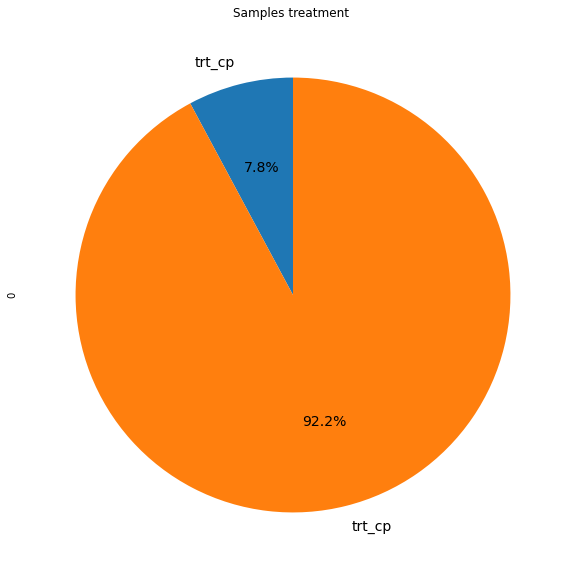

In [ ]:
cp_type_df = train[['cp_type']]

cp_type = cp_type_df.groupby(['cp_type']).size().reset_index()
cp_type.plot(kind='pie' ,y = 0, autopct='%1.1f%%',  title = "Samples treatment ",
startangle=90, shadow=False, labels= cp_type_df['cp_type'], legend = False, fontsize=14, figsize=(10, 10))

plt.show()


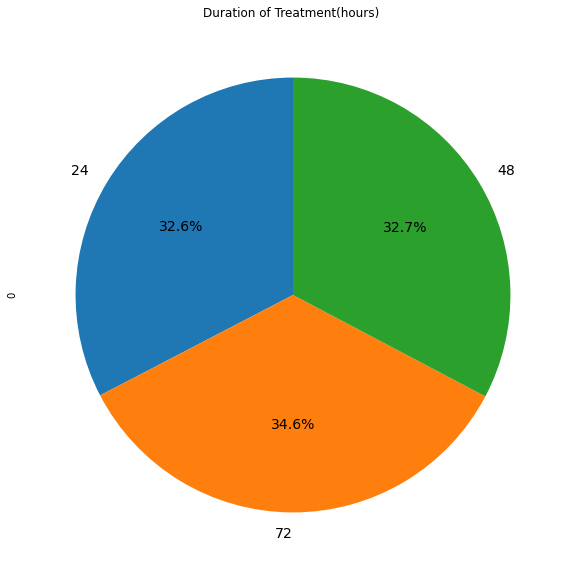

In [ ]:
cp_time_df = train[['cp_time']]

cp_time = cp_time_df.groupby(['cp_time']).size().reset_index()
cp_time.plot(kind='pie' ,y = 0, autopct='%1.1f%%',  title = "Duration of Treatment(hours) ",
startangle=90, shadow=False, labels= cp_time_df['cp_time'], legend = False, fontsize=14, figsize=(10, 10))

plt.show()

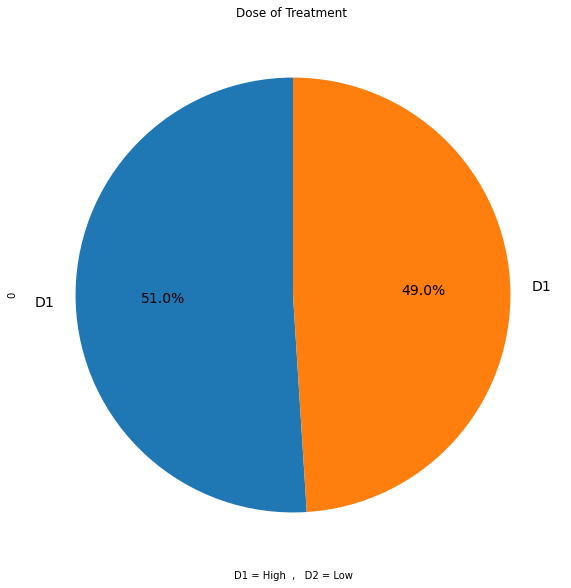

In [ ]:
cp_dose_df = train[['cp_dose']]

cp_dose = cp_dose_df.groupby(['cp_dose']).size().reset_index()
cp_dose.plot(kind='pie' ,y = 0, autopct='%1.1f%%',  title = "Dose of Treatment ",
startangle=90, shadow=False, labels= cp_dose_df['cp_dose'], legend = False, fontsize=14, figsize=(10, 10))
plt.xlabel("D1 = High  ,   D2 = Low")

plt.show()


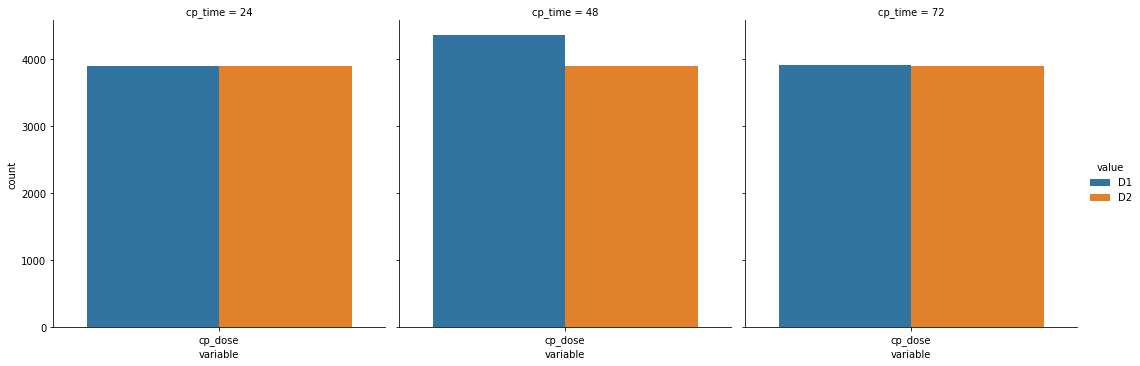

In [ ]:
plot_melt = pd.melt(train, id_vars=['cp_time' , 'cp_type'], value_vars=[ 'cp_dose'])

fig = sns.catplot(x="variable", y=None, col= 'cp_time' ,hue="value",
                         data=plot_melt, 
                         kind="count", ci=None )

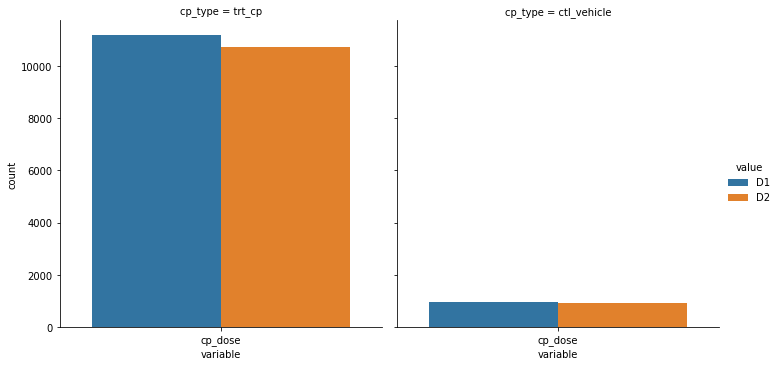

In [ ]:
plot_melt = pd.melt(train, id_vars=['cp_time' , 'cp_type'], value_vars=[ 'cp_dose'])

fig = sns.catplot(x="variable", y=None, col= 'cp_type' ,hue="value",
                         data=plot_melt, 
                         kind="count", ci=None )

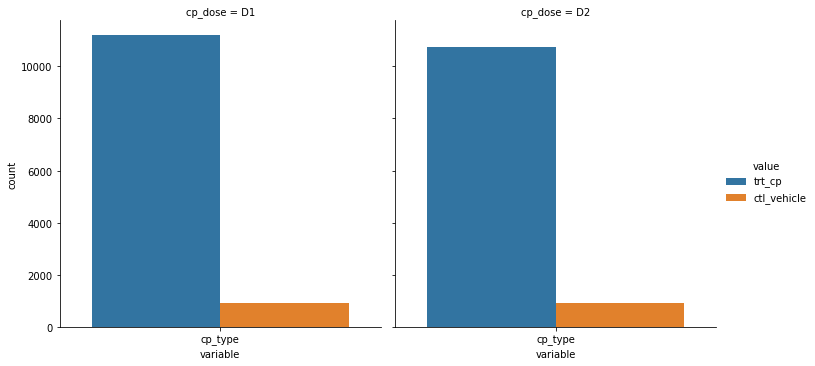

In [ ]:
plot_melt = pd.melt(train, id_vars=['cp_time' ,'cp_dose'], value_vars=[ 'cp_type'])

fig = sns.catplot(x="variable", y=None, col= 'cp_dose' ,hue="value",
                         data=plot_melt, 
                         kind="count", ci=None  )

In [ ]:
train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0

In [ ]:
print('Number of "gene : ', len([_ for _ in train.columns if _.startswith('g-')]))
print('Number of "cell : ', len([_ for _ in train.columns if _.startswith('c-')]))

Number of "gene :  772
Number of "cell :  100


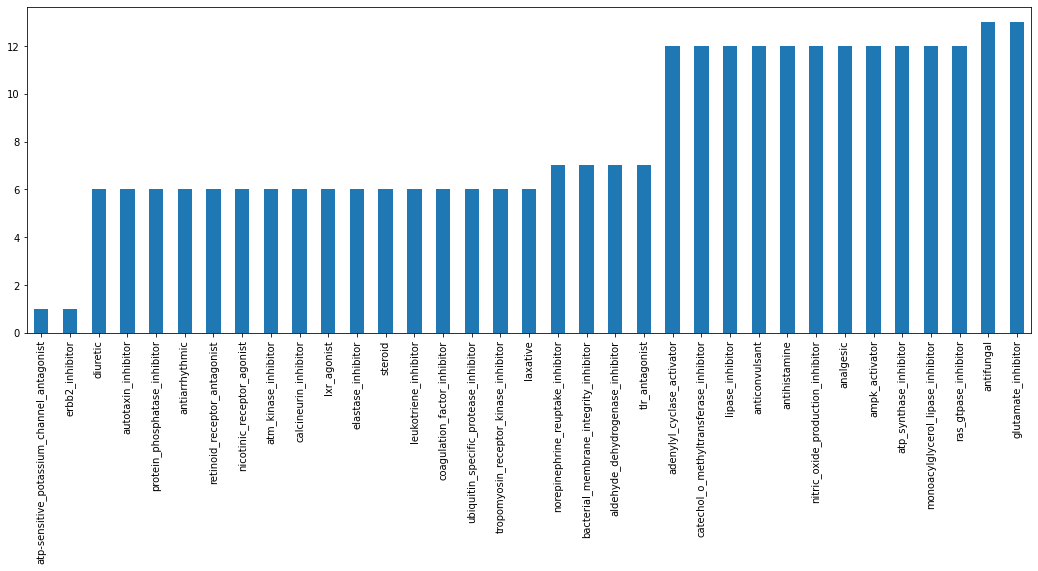

In [ ]:
train_target.sum().sort_values()[:35].plot.bar(figsize=(18,6))
plt.show()

In [ ]:
x_cell = train.iloc[:,3:75]

In [ ]:
x_cell.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-1.1980,0.3116,-1.0330,0.2208,-0.1143,-0.0251,0.0350,0.4233,-0.1221,-0.4927,0.6119,0.4715,-0.0351,-0.1605,-0.6750,0.2263,0.5790,0.9588,0.6061,-0.1300,0.6611,-0.3136,-0.2020,0.0251,0.1670,-0.4195,0.6551,-0.7395,-0.7047,-0.5369
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,0.1194,-0.3958,-1.1730,0.4509,1.9250,1.1010,0.2648,-0.3615,0.1710,-0.8900,1.2730,-0.5036,-0.2277,-0.7339,-0.4283,-0.1231,-0.6328,0.4759,0.3249,-0.7408,-0.5814,1.7840,-0.1087,1.0350,0.4087,-0.6948,-0.8026,0.0954,-0.4054,0.1197,0.1956,0.0720
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.0357,-0.3636,-0.4653,-0.8346,0.1113,-0.7615,-0.4983,0.4552,-0.0978,-0.2661,0.6058,0.2686,-0.6191,-0.4444,1.2540,0.0621,-0.1757,-1.4370,0.5553,0.8346,-0.3334,-0.2933,-0.1644,-1.1280,-0.0292,0.0939,0.5916,0.6809,0.7821,0.6801
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,0.1353,-1.6400,-0.7483,-1.0820,-0.1521,0.0747,-0.4851,0.6636,-2.8230,-0.6035,-1.3550,2.0200,-0.5301,-1.3240,-0.5936,0.4331,0.0899,-1.5240,0.3936,1.4630,-1.2100,-1.2340,-1.0300,0.7977,0.2314,0.1186,1.5370,0.3868,-0.4038,0.9767
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,0.1302,0.1224,0.9584,0.2126,0.6162,1.1570,1.1140,-0.9416,-0.3780,-0.8147,-0.0803,-0.3818,0.6877,0.0000,0.1776,1.1320,-0.1180,1.2130,0.7709,0.6745,0.7871,1.6410,0.1806,1.3480,1.1070,0.5392,0.0000,0.1255,-0.1556,-0.5436,0.8585,0.5801


In [ ]:
x_cell.iloc[1].values

array([ 0.0743,  0.4087,  0.2991,  0.0604,  1.019 ,  0.5207,  0.2341,
        0.3372, -0.4047,  0.8507, -1.152 , -0.4201, -0.0958,  0.459 ,
        0.0803,  0.225 ,  0.5293,  0.2839, -0.3494,  0.2883,  0.9449,
       -0.1646, -0.2657, -0.3372,  0.3135, -0.4316,  0.4773,  0.2075,
       -0.4216, -0.1161, -0.0499, -0.2627,  0.9959, -0.2483,  0.2655,
       -0.2102,  0.1656,  0.53  , -0.2568, -0.0455,  0.1194, -0.3958,
       -1.173 ,  0.4509,  1.925 ,  1.101 ,  0.2648, -0.3615,  0.171 ,
       -0.89  ,  1.273 , -0.5036, -0.2277, -0.7339, -0.4283, -0.1231,
       -0.6328,  0.4759,  0.3249, -0.7408, -0.5814,  1.784 , -0.1087,
        1.035 ,  0.4087, -0.6948, -0.8026,  0.0954, -0.4054,  0.1197,
        0.1956,  0.072 ])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


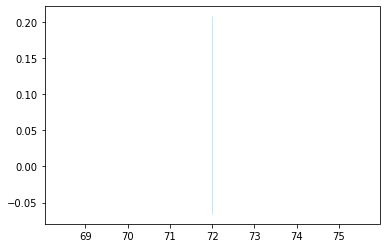

In [ ]:
y = train_target

sns.lineplot( x_cell.shape[1] ,x_cell.iloc[1].values)



plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


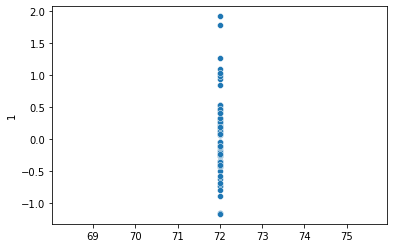

In [ ]:
sns.scatterplot( x_cell.iloc[1].shape[0],x_cell.iloc[1], data = x_cell.iloc[1].values)
plt.show()

In [ ]:
train['g-5'].values

array([-1.012 ,  0.5207,  1.239 , ..., -0.0159, -0.0343, -3.675 ])

**Standard Deviation of Gene Expression**

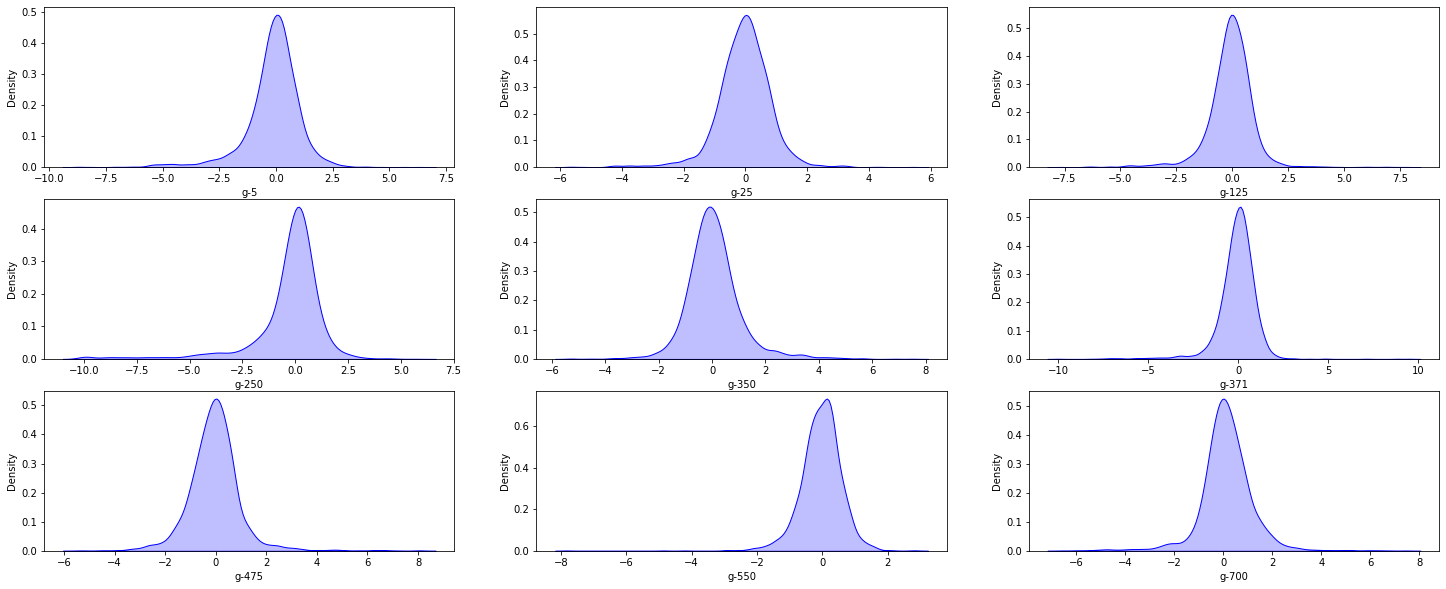

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(25, 10))

sns.kdeplot(test['g-5'], shade = True, color = 'blue', ax=ax[0, 0])
sns.kdeplot(test['g-25'], shade = True, color = 'blue', ax=ax[0, 1])
sns.kdeplot(test['g-125'], shade = True, color =  'blue'   , ax=ax[0, 2])
sns.kdeplot(test['g-250'], shade = True, color = 'blue' , ax=ax[1, 0])
sns.kdeplot(test['g-350'], shade = True, color = 'blue' , ax=ax[1, 1])
sns.kdeplot(test['g-371'], shade = True, color = 'blue' , ax=ax[1, 2])
sns.kdeplot(test['g-475'], shade = True, color = 'blue' , ax=ax[2, 0])
sns.kdeplot(test['g-550'], shade = True, color = 'blue', ax=ax[2, 1])
sns.kdeplot(test['g-700'], shade = True, color =   'blue'  , ax=ax[2, 2])

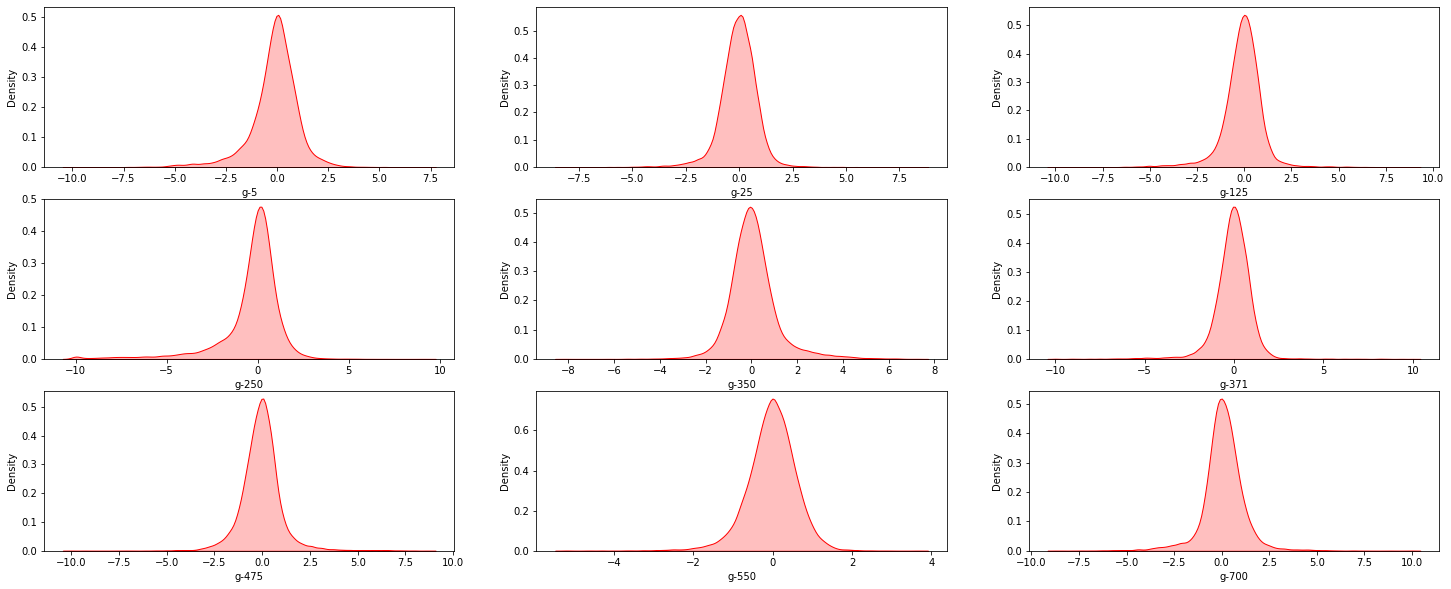

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(25, 10))

sns.kdeplot(train['g-5'], shade = True, color = 'red', ax=ax[0, 0])
sns.kdeplot(train['g-25'], shade = True, color = 'red', ax=ax[0, 1])
sns.kdeplot(train['g-125'], shade = True, color =  'red'   , ax=ax[0, 2])
sns.kdeplot(train['g-250'], shade = True, color = 'red' , ax=ax[1, 0])
sns.kdeplot(train['g-350'], shade = True, color = 'red' , ax=ax[1, 1])
sns.kdeplot(train['g-371'], shade = True, color = 'red' , ax=ax[1, 2])
sns.kdeplot(train['g-475'], shade = True, color = 'red' , ax=ax[2, 0])
sns.kdeplot(train['g-550'], shade = True, color = 'red', ax=ax[2, 1])
sns.kdeplot(train['g-700'], shade = True, color =   'red'  , ax=ax[2, 2])

**Standard Deviation of Cell Viability**

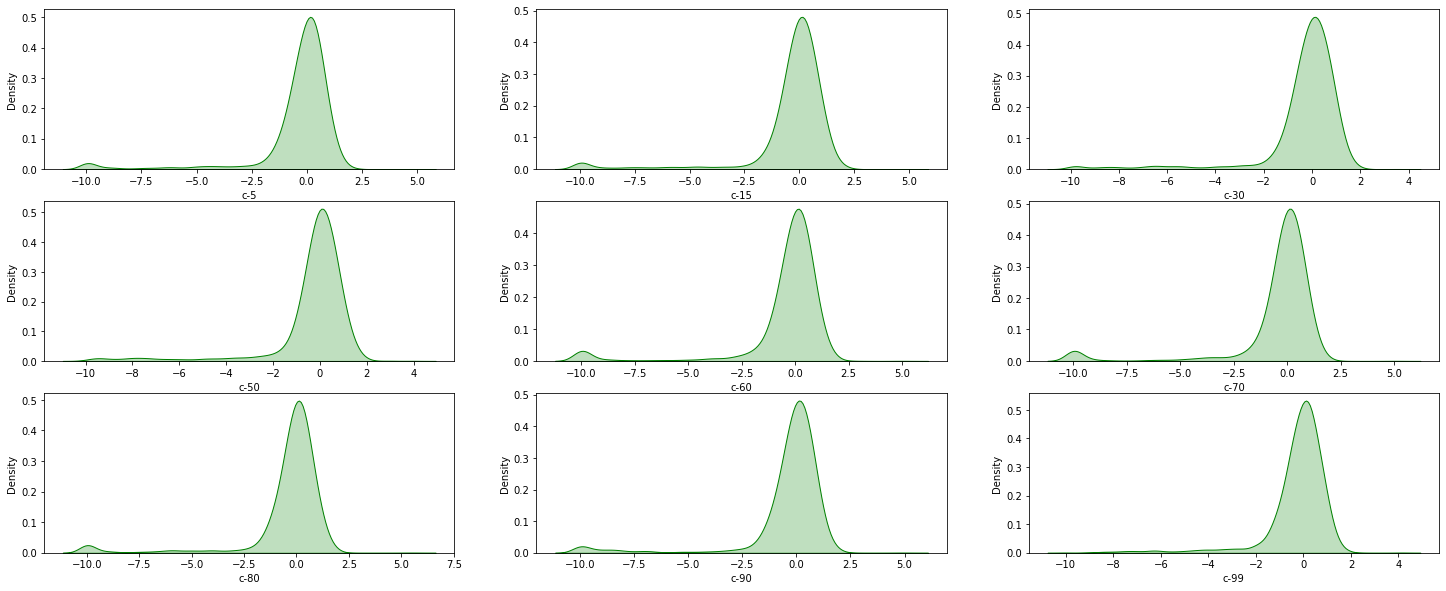

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(25, 10))

sns.kdeplot(test['c-5'], shade = True, color = 'green', ax=ax[0, 0])
sns.kdeplot(test['c-15'], shade = True, color = 'green', ax=ax[0, 1])
sns.kdeplot(test['c-30'], shade = True, color =  'green'   , ax=ax[0, 2])
sns.kdeplot(test['c-50'], shade = True, color = 'green' , ax=ax[1, 0])
sns.kdeplot(test['c-60'], shade = True, color = 'green' , ax=ax[1, 1])
sns.kdeplot(test['c-70'], shade = True, color = 'green' , ax=ax[1, 2])
sns.kdeplot(test['c-80'], shade = True, color = 'green' , ax=ax[2, 0])
sns.kdeplot(test['c-90'], shade = True, color = 'green', ax=ax[2, 1])
sns.kdeplot(test['c-99'], shade = True, color ='green'  , ax=ax[2, 2])

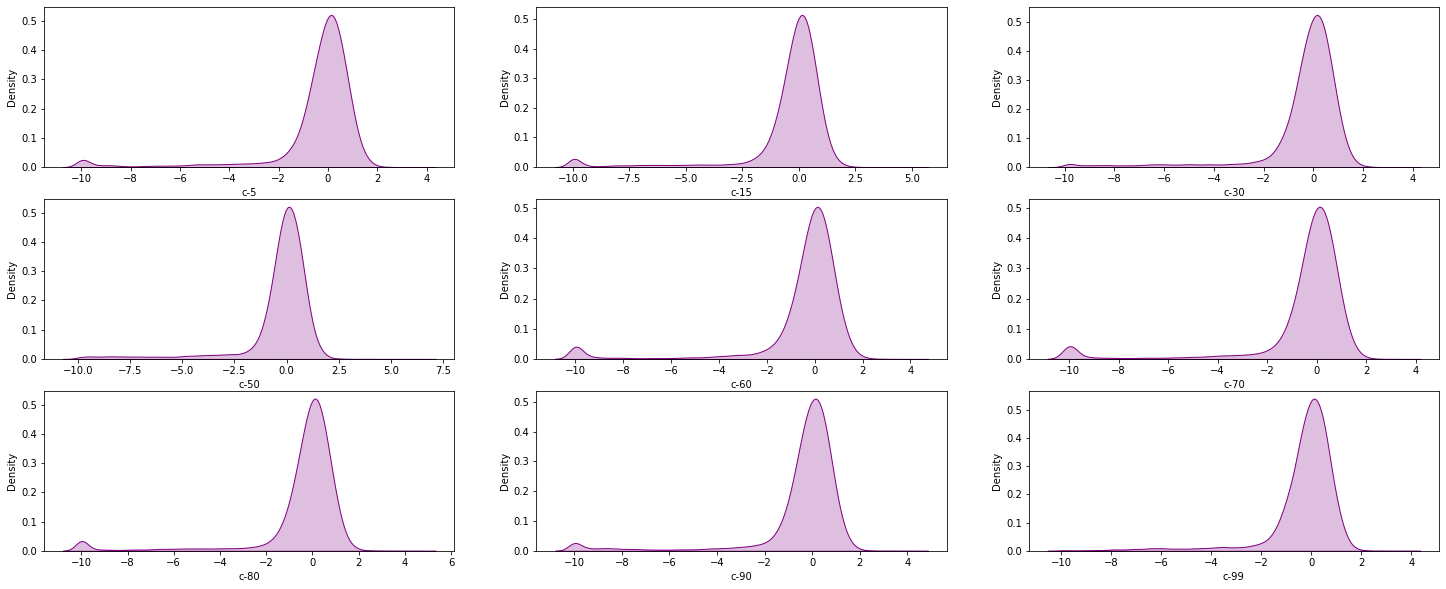

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(25, 10))

sns.kdeplot(train['c-5'], shade = True, color =  'purple', ax=ax[0, 0])
sns.kdeplot(train['c-15'], shade = True, color = 'purple', ax=ax[0, 1])
sns.kdeplot(train['c-30'], shade = True, color = 'purple'   , ax=ax[0, 2])
sns.kdeplot(train['c-50'], shade = True, color = 'purple' , ax=ax[1, 0])
sns.kdeplot(train['c-60'], shade = True, color = 'purple' , ax=ax[1, 1])
sns.kdeplot(train['c-70'], shade = True, color = 'purple' , ax=ax[1, 2])
sns.kdeplot(train['c-80'], shade = True, color = 'purple' , ax=ax[2, 0])
sns.kdeplot(train['c-90'], shade = True, color = 'purple', ax=ax[2, 1])
sns.kdeplot(train['c-99'], shade = True, color = 'purple'  , ax=ax[2, 2])

**Mean of gene feature**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


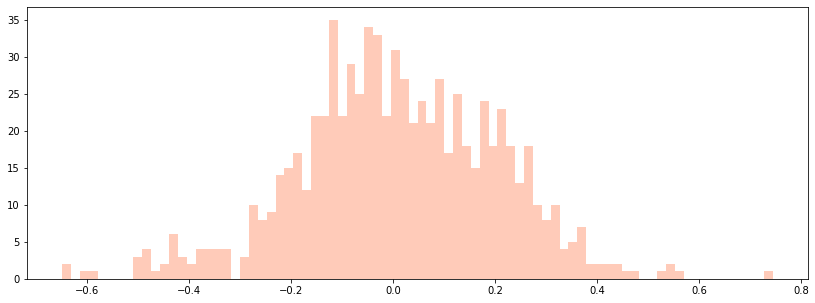

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.distplot(train.iloc[:,3:775].mean(), kde=False ,color = 'coral', bins = 80 )

**Standard Deviation of gene feature**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


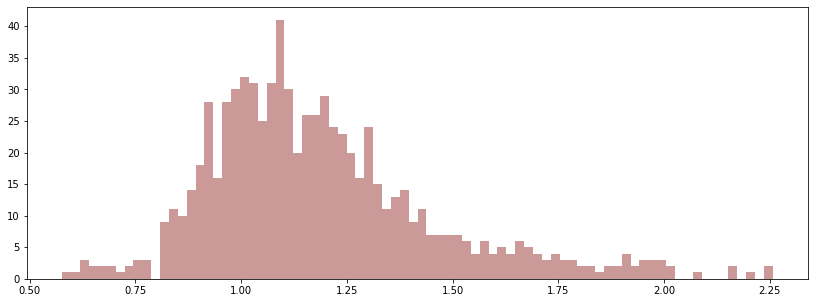

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.distplot(train.iloc[:,3:775].std(), kde=False ,color = 'maroon', bins =80 )

**Mean of cell feature**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


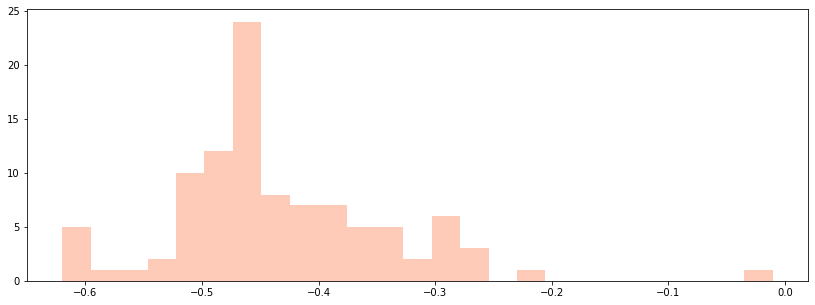

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.distplot(train.iloc[:,775:].mean(), kde=False ,color = 'coral', bins = 25 )

**Standard Deviation of gene feature**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


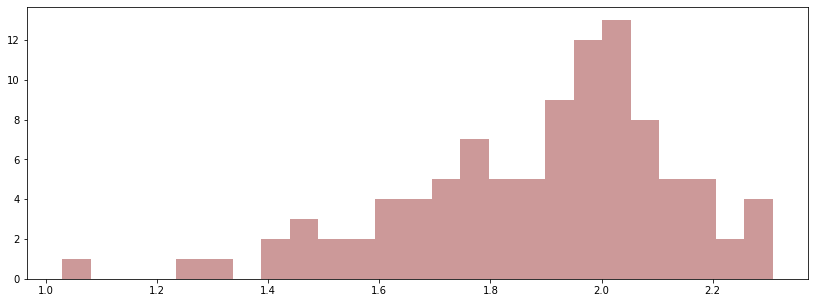

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.distplot(train.iloc[:,775:].std(), kde=False ,color = 'maroon', bins = 25 )

**Heatmap of correlation**

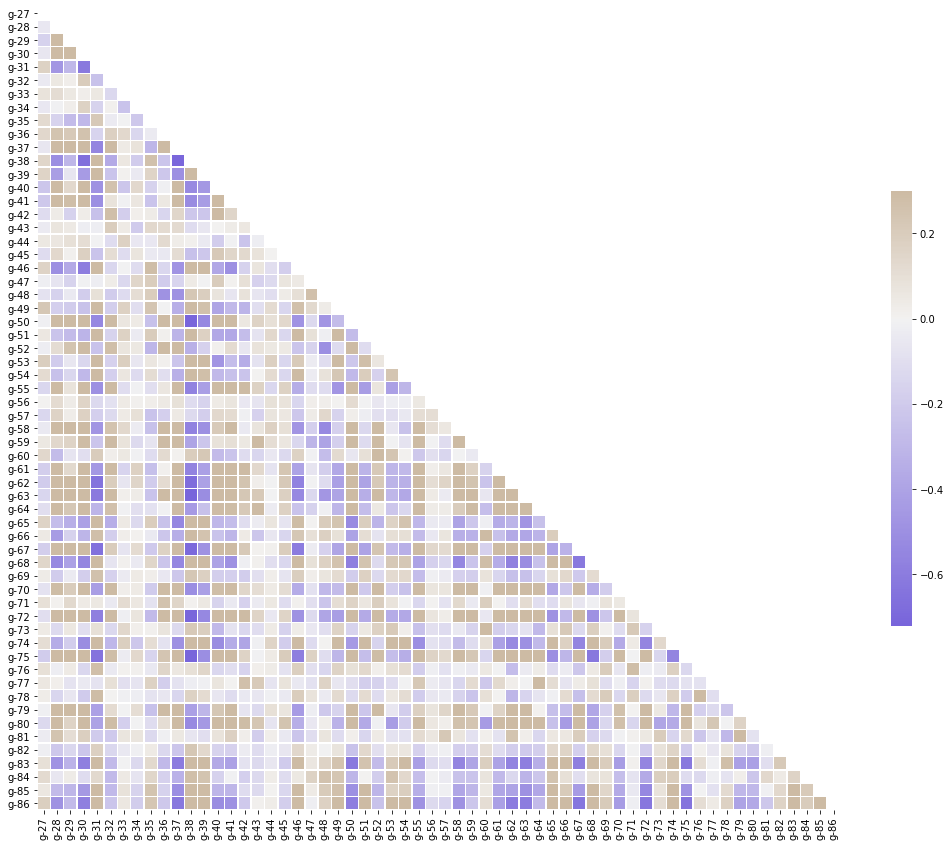

In [ ]:
corr = train.iloc[: ,30:90].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 16))
cmap = sns.diverging_palette(270, 50, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**PCA Visualization**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Gene_DataFrame = train.iloc[:,3:775]
Gene_DataFrame.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,-0.9041,-0.8089,0.6598,-0.4772,0.1289,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,3.1050,0.0204,-0.0961,0.2919,-0.4584,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,-0.4954,-0.1840,-1.1110,-0.5649,-0.2617,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,0.2239,0.4428,-0.2822,-0.8175,1.4930,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,-0.2094,1.1270,0.1874,-0.0465,1.0560,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269


In [ ]:
Gene_columns_name_list = Gene_DataFrame.columns.tolist()
for _ in Gene_columns_name_list:
  Gene_DataFrame[[_]] = StandardScaler().fit_transform(Gene_DataFrame[[_]])

In [ ]:
pca = PCA(n_components=2)
G_reduced = pca.fit_transform(Gene_DataFrame)
G_reduced_Df = pd.DataFrame(G_reduced, columns = ['1' , '2'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


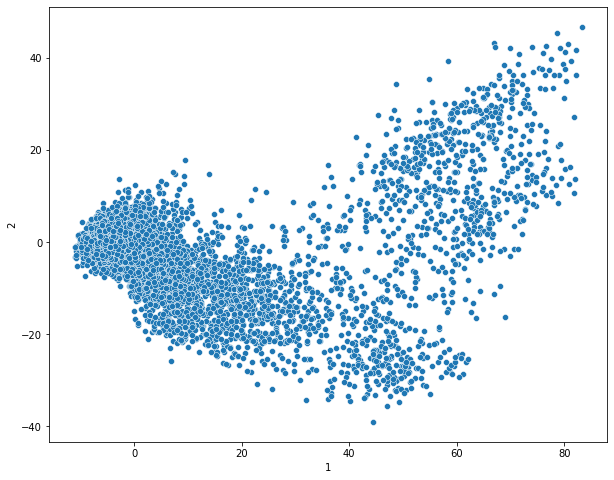

In [ ]:
fig = plt.subplots(figsize=(10, 8))
sns.scatterplot(G_reduced_Df['1'] , G_reduced_Df['2'])

In [ ]:
Cell_DataFrame = train.iloc[:,775:]
Cell_DataFrame.head()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
Cell_columns_name_list = Cell_DataFrame.columns.tolist()
for _ in Cell_columns_name_list:
  Cell_DataFrame[[_]] = StandardScaler().fit_transform(Cell_DataFrame[[_]])

In [ ]:
pca = PCA(n_components=2)
C_reduced = pca.fit_transform(Cell_DataFrame)
C_reduced_Df = pd.DataFrame(C_reduced, columns = ['1' , '2'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


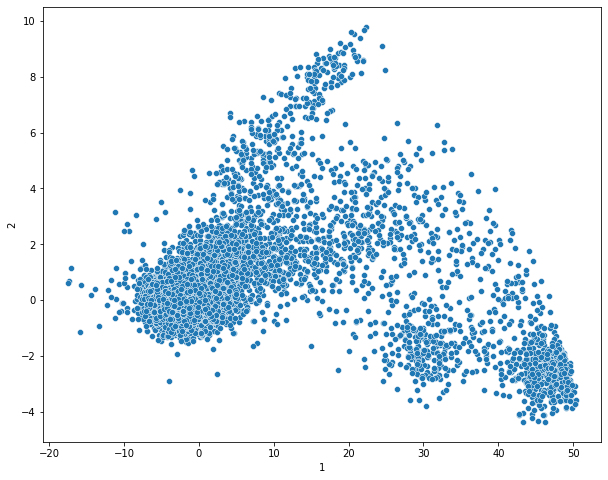

In [ ]:
fig = plt.subplots(figsize=(10, 8))
sns.scatterplot(C_reduced_Df['1'] , C_reduced_Df['2'])
plt.show()

In [ ]:
from sklearn.cluster  import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2 , affinity = 'euclidean' , linkage = 'ward')

**Data Preprocessing**

In [ ]:
Gene_train_cluster = cluster.fit_predict(train.iloc[:,3:775])
Gene_test_cluster = cluster.fit_predict(test.iloc[:,3:775])

In [ ]:
Cell_train_cluster = cluster.fit_predict(train.iloc[:,775:])
Cell_test_cluster = cluster.fit_predict(test.iloc[:,775:])

In [ ]:
Gene_train_cluster = pd.DataFrame(Gene_train_cluster, columns = ['gene_cluster'],dtype= float)
Gene_test_cluster = pd.DataFrame(Gene_test_cluster, columns = ['gene_cluster'],dtype= float)

In [ ]:
Cell_train_cluster = pd.DataFrame(Cell_train_cluster, columns = ['cell_cluster'],dtype= float)
Cell_test_cluster = pd.DataFrame(Cell_test_cluster, columns = ['cell_cluster'],dtype= float)

In [ ]:
train = pd.concat([train,Gene_train_cluster],axis = 1)
train = pd.concat([train,Cell_train_cluster],axis = 1)

In [ ]:
test = pd.concat([test,Gene_test_cluster],axis = 1)
test = pd.concat([test,Cell_test_cluster],axis = 1)

In [ ]:
columns_names = train.iloc[:,3:-2].columns.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler
for x in columns_names:
  train[[x]] = StandardScaler().fit_transform(train[[x]])
  test[[x]] = StandardScaler().fit_transform(test[[x]])

In [ ]:
Lb = LabelEncoder()
train['cp_type'] = Lb.fit_transform(train['cp_type'])
train['cp_dose'] = Lb.fit_transform( train['cp_dose'])
train =   pd.get_dummies( train , columns =['cp_time'])

In [ ]:
test['cp_type'] = Lb.fit_transform(test['cp_type'])
test['cp_dose'] = Lb.fit_transform( test['cp_dose'])
test =   pd.get_dummies( test , columns =['cp_time'])

In [ ]:
test.head()

,cp_type,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,gene_cluster,cell_cluster,cp_time_24,cp_time_48,cp_time_72
0,1,0,-0.541228,0.242148,-0.610515,0.411830,1.506767,-0.013735,-0.261157,0.357458,-0.094795,1.662734,-0.089822,-0.429181,0.985200,0.969384,0.144719,1.099725,-0.246242,0.075385,-0.381206,-0.720201,-0.435314,0.277899,-0.020180,0.592966,0.270857,0.623754,0.749024,0.505864,-0.185118,-0.034966,-0.214495,-0.241481,-0.744482,-0.534757,-1.292604,-0.127293,0.449457,0.513605,...,0.111579,0.537615,-0.178380,-0.593047,0.445050,0.262076,-0.402174,0.204822,0.013685,-0.610137,0.076956,0.487931,-0.042149,0.358331,0.250150,0.178204,0.371620,0.185094,-0.249570,-0.270752,0.210207,0.220945,0.163753,-0.116649,0.031823,0.262349,0.606970,0.169501,0.120187,0.115796,0.138047,0.213217,0.160807,0.310422,-0.372637,0.0,0.0,1,0,0
1,1,0,-0.276975,0.368823,1.003885,-0.528316,-0.420200,-0.152764,-2.202173,0.522961,-0.110881,-0.015484,0.802436,0.132228,-0.950608,-0.411042,0.193587,-0.810284,-0.658447,-0.816923,-0.233318,-0.884692,-0.458584,0.957049,0.595058,0.146634,0.502146,-0.108692,-0.079462,1.881209,-0.572021,-0.415348,-0.158507,-0.267992,-0.221710,0.125857,-0.558702,1.180101,-0.601879,-0.321725,...,-0.111110,0.072253,0.174442,0.106458,-0.323691,-0.442150,0.311699,0.238836,-0.450624,-0.337679,0.165865,-0.287573,-0.088692,-0.202633,0.279009,-0.749545,-0.402100,-0.144541,-0.084163,-0.484207,-0.205482,0.488010,0.532716,-0.066462,0.286000,0.154494,0.114283,-0.282824,-0.425013,0.051267,-0.116532,0.220357,-0.096666,-0.545130,-0.339445,0.0,0.0,0,0,1
2,0,0,-0.008935,-0.096402,-0.495729,0.085674,-1.499591,0.326492,-0.406617,-0.141256,0.517679,0.407428,0.044847,-0.638550,2.020807,-0.770729,0.848284,-0.044402,0.049630,1.053655,-0.827400,-1.243737,0.728787,-0.354087,-0.618780,0.215860,-0.141065,0.260614,0.600033,-0.775621,0.076488,0.131003,0.360608,-0.490321,-0.334773,-0.127174,-1.140648,0.187757,0.364844,0.486333,...,-0.084122,-0.056818,0.255829,0.281667,0.552693,0.182088,0.530646,0.464370,0.570450,1.037199,0.445634,0.954894,-0.049277,0.027780,0.504745,0.778547,0.606521,0.319970,-0.022776,0.956527,0.306233,0.908567,-0.187221,0.487604,0.115848,0.101287,0.376014,-0.462633,0.621595,-0.685671,-0.405691,0.618271,0.804914,0.501078,0.055756,0.0,0.0,1,0,0
3,1,1,0.207768,0.323225,0.229742,0.394564,-0.641853,-0.874969,0.685845,-0.011960,0.662994,0.139288,1.162706,-1.037107,0.865675,-0.792183,0.205371,-0.451443,-0.797097,1.663451,1.619217,-0.034762,-0.406056,-0.861572,-0.728298,0.146634,-0.651801,0.951174,-0.029160,0.368927,0.960310,-0.317043,0.353449,0.084575,0.210975,0.176816,-0.562478,0.568398,0.416390,0.233413,...,0.251424,0.004409,0.021054,-0.093903,-0.193462,-0.005320,0.146159,0.515850,0.333712,0.379156,0.535892,-0.011308,0.099000,0.273316,-0.072701,0.506159,0.160263,0.294690,-0.004828,-0.140080,-0.050844,0.349028,-0.564807,0.301657,-0.444051,0.276210,0.285796,0.151469,-0.308953,0.021725,-0.336714,0.592823,0.112297,0.541342,-0.229471,0.0,0.0,1,0,0
4,1,0,-0.433532,-1.505069,1.665025,0.164318,-0.642759,0.108943,0.584605,0.738271,0.257600,-1.163162,-0.046931,-0.296520,-0.105238,-0.142516,0.295570,-0.172571,0.689894,0.174958,-0.202109,0.278818,0.218728,1.055196,-0.103585,0.146634,-0.829267,-0.024918,0.877382,-0.423593,0.463297,-0.064505,0.309066,0.090988,0.318236,0.526828,-0.742891,-0.757777,1.337628,0.198673,...,0.049446,0.539030,-0.175545,0.726991,0.160497,0.588570,0.878672,0.426781,0.727119,0.833025,0.510804,0.320988,0.134956,1.018288,-0.149510,0.403770,0.150229,0.168291,0.744280,0.625345,0.716517,-0.151673,0.304875,0.716838,0.686413,0.460274,0.586922,0.161860,0.711154,0.490080,0.872977,0.061202,-0.129832,0.780696,1.554687,0.0,0.0,0,1,0


**Ml Model and Predictions**

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow import keras


In [ ]:
with tf.device('/GPU:0'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(train.shape[1]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(8192, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(2048, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(2048, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(1024, activation="relu")),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tfa.layers.WeightNormalization(tf.keras.layers.Dense(train_target.shape[1], activation="sigmoid"))
        ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
        
    )
   
    history = model.fit(
     train, train_target, verbose=2, epochs=60,batch_size=32,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor = 'loss',
            factor=0.2, 
            patience=10,
             
            mode = 'auto',
            verbose=1
        )
     ]
)

Epoch 1/60
745/745 - 36s - loss: 0.1169 - accuracy: 0.0371
Epoch 2/60
745/745 - 33s - loss: 0.0194 - accuracy: 0.0714
Epoch 3/60
745/745 - 33s - loss: 0.0179 - accuracy: 0.0894
Epoch 4/60
745/745 - 33s - loss: 0.0171 - accuracy: 0.0983
Epoch 5/60
745/745 - 33s - loss: 0.0167 - accuracy: 0.1073
Epoch 6/60
745/745 - 33s - loss: 0.0163 - accuracy: 0.1148
Epoch 7/60
745/745 - 33s - loss: 0.0160 - accuracy: 0.1173
Epoch 8/60
745/745 - 33s - loss: 0.0157 - accuracy: 0.1226
Epoch 9/60
745/745 - 33s - loss: 0.0154 - accuracy: 0.1291
Epoch 10/60
745/745 - 33s - loss: 0.0151 - accuracy: 0.1342
Epoch 11/60
745/745 - 33s - loss: 0.0148 - accuracy: 0.1428
Epoch 12/60
745/745 - 33s - loss: 0.0144 - accuracy: 0.1468
Epoch 13/60
745/745 - 33s - loss: 0.0141 - accuracy: 0.1563
Epoch 14/60
745/745 - 33s - loss: 0.0137 - accuracy: 0.1654
Epoch 15/60
745/745 - 33s - loss: 0.0132 - accuracy: 0.1742
Epoch 16/60
745/745 - 33s - loss: 0.0127 - accuracy: 0.1860
Epoch 17/60
745/745 - 33s - loss: 0.0121 - accura

In [ ]:
acc      = history.history[ 'accuracy' ]
loss     = history.history[ 'loss' ]
epochs   = range(len(acc)) 


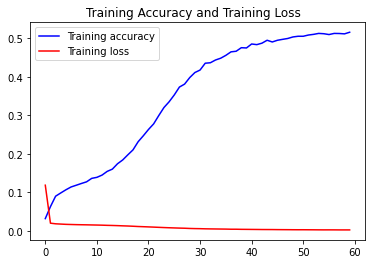

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot  (epochs, acc ,'b', label='Training accuracy' )
plt.plot  (epochs, loss  , 'r' , label='Training loss')
plt.title ('Training Accuracy and Training Loss  '   )
plt.legend(loc=0)
plt.figure()
plt.show()